In [2]:
# Cell 1: Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", context="notebook")

In [5]:
# Cell 2: Load dataset
# Replace with your actual path if needed
df = pd.read_csv("Data_file - data_file.csv")

# Quick peek
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [6]:
# Cell 3: Basic info and missing values
df.info()
df.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Cell 4: Summary statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


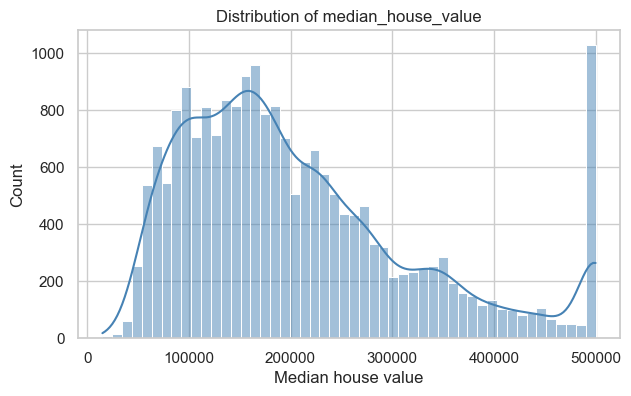

In [8]:
# Cell 5: Target distribution
plt.figure(figsize=(7,4))
sns.histplot(df['median_house_value'], bins=50, kde=True, color='steelblue')
plt.title("Distribution of median_house_value")
plt.xlabel("Median house value")
plt.show()

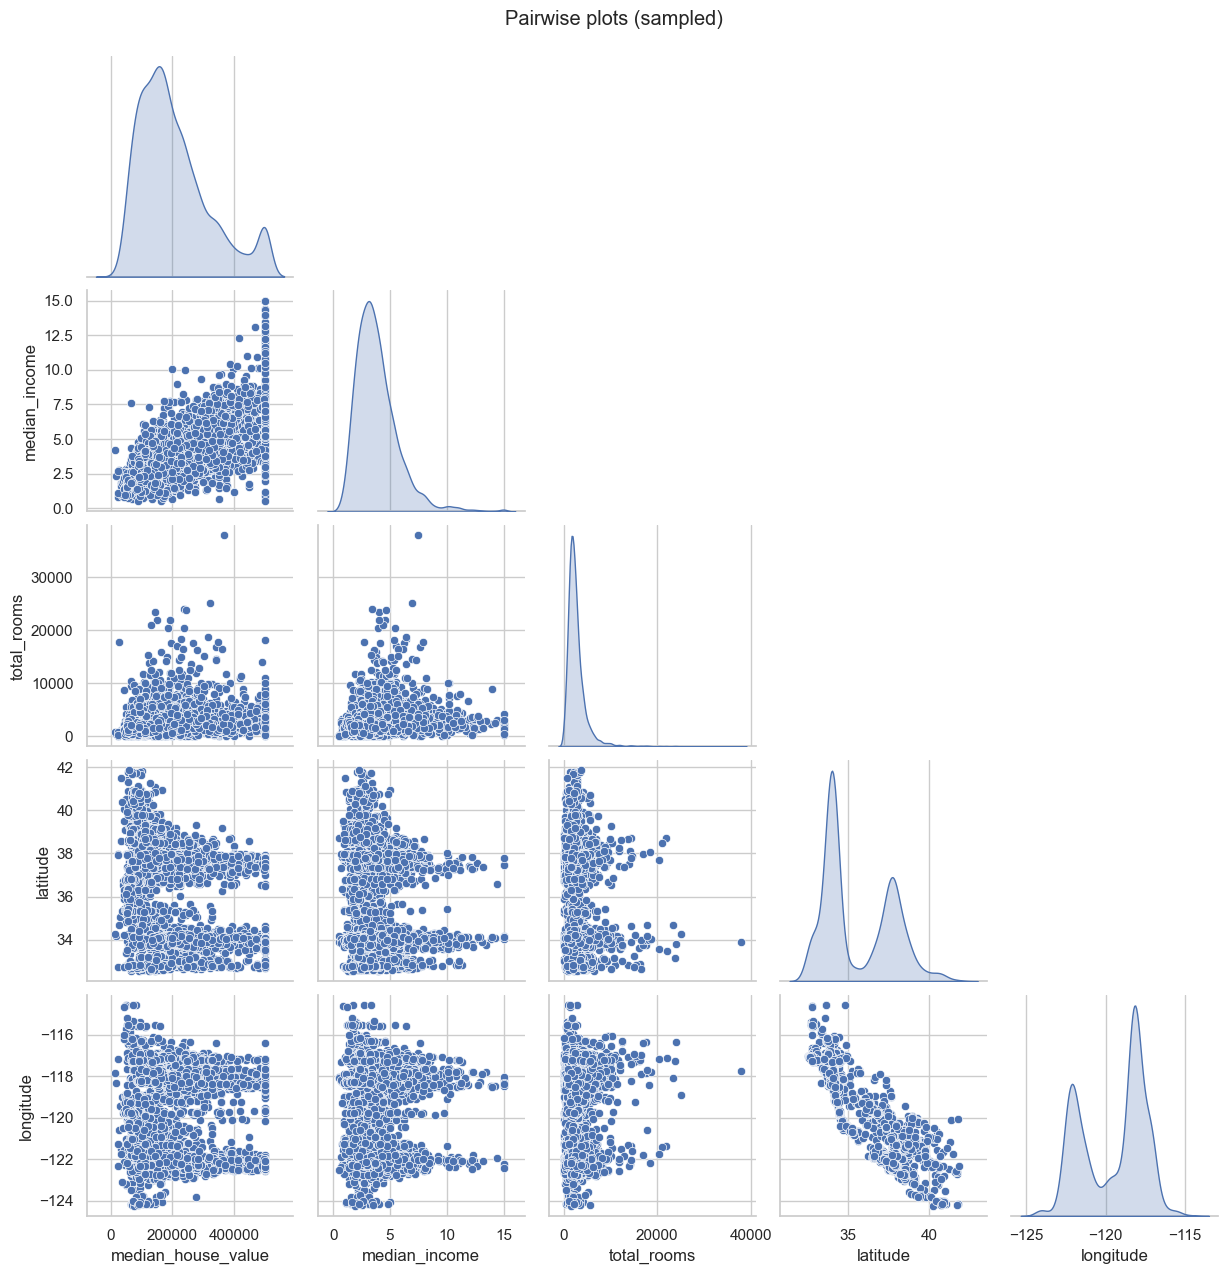

In [9]:
# Cell 6: Pairwise relationships (sampled for speed if large)
sample = df.sample(min(5000, len(df)), random_state=42)
sns.pairplot(sample[['median_house_value','median_income','total_rooms','latitude','longitude']], 
             diag_kind='kde', corner=True)
plt.suptitle("Pairwise plots (sampled)", y=1.02)
plt.show()

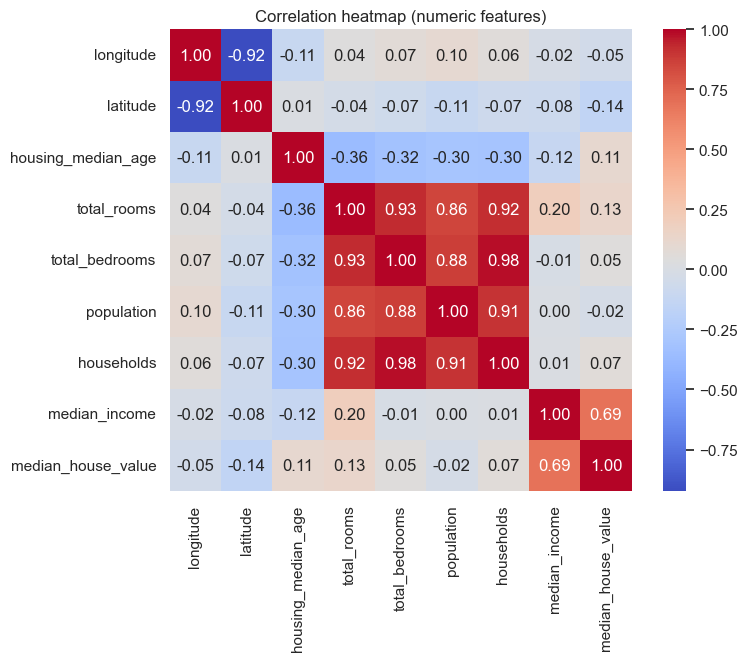

In [10]:
# Cell 7: Correlation heatmap (numeric only)
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap (numeric features)")
plt.show()

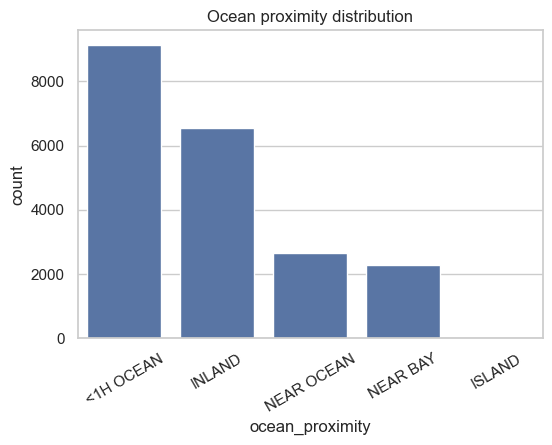

In [11]:
# Cell 8: Ocean proximity counts (if present)
if 'ocean_proximity' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='ocean_proximity', data=df, order=df['ocean_proximity'].value_counts().index)
    plt.title("Ocean proximity distribution")
    plt.xticks(rotation=30)
    plt.show()

In [12]:
# Cell 9: Define target and features
target = 'median_house_value'
assert target in df.columns, "Target column 'median_house_value' not found. Please adjust."

X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((16512, 9), (4128, 9))

In [13]:
# Cell 10: Identify column types
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical features: ['ocean_proximity']


In [14]:
# Cell 11: Build transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

In [15]:
# Cell 12: Simple Linear Regression using median_income only
simple_feature = 'median_income'
assert simple_feature in X_train.columns, f"'{simple_feature}' not found in features."

# Build a minimal pipeline for one feature
simple_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

simple_preprocessor = ColumnTransformer(
    transformers=[
        ('num', simple_numeric_transformer, [simple_feature])
    ],
    remainder='drop'
)

simple_model = Pipeline(steps=[
    ('preprocess', simple_preprocessor),
    ('regressor', LinearRegression())
])

# Train
simple_model.fit(X_train, y_train)

# Predict
y_pred_simple = simple_model.predict(X_test)

# Evaluate
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple LR — Feature: {simple_feature}")
print(f"MSE:  {mse_simple:,.2f}")
print(f"RMSE: {rmse_simple:,.2f}")
print(f"R^2:  {r2_simple:.4f}")

Simple LR — Feature: median_income
MSE:  7,091,157,771.77
RMSE: 84,209.01
R^2:  0.4589


In [16]:
# Cell 14: Full pipeline with all features
full_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Train
full_model.fit(X_train, y_train)

# Predict
y_pred_full = full_model.predict(X_test)

# Evaluate
mse_full = mean_squared_error(y_test, y_pred_full)
rmse_full = np.sqrt(mse_full)
r2_full = r2_score(y_test, y_pred_full)

print("Multiple LR — All features")
print(f"MSE:  {mse_full:,.2f}")
print(f"RMSE: {rmse_full:,.2f}")
print(f"R^2:  {r2_full:.4f}")

Multiple LR — All features
MSE:  4,908,290,571.35
RMSE: 70,059.19
R^2:  0.6254


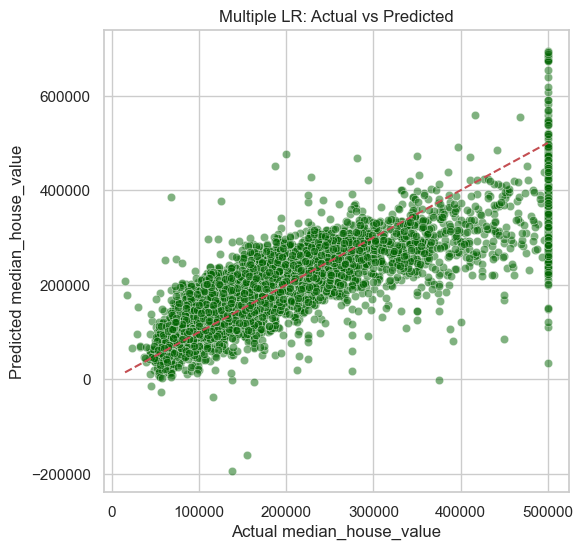

In [17]:
# Cell 15: Plot predictions vs actuals for full model
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_full, alpha=0.5, color='darkgreen')
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Multiple LR: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [18]:
# Cell 16: Comparison summary
comparison = pd.DataFrame({
    'Model': ['Simple LR (median_income)', 'Multiple LR (all features)'],
    'MSE': [mse_simple, mse_full],
    'RMSE': [rmse_simple, rmse_full],
    'R2': [r2_simple, r2_full]
})
comparison

,Model,MSE,RMSE,R2
0,Simple LR (median_income),7.091158e+09,84209.012414,0.458859
1,Multiple LR (all features),4.908291e+09,70059.193339,0.625438


In [19]:
# Cell 17: Extract feature names after preprocessing
def get_feature_names(preprocessor):
    feature_names = []
    # Numeric
    num_features = preprocessor.named_transformers_['num'].named_steps['imputer'].feature_names_in_
    feature_names.extend([f"num__{f}" for f in num_features])
    # Categorical
    if 'cat' in preprocessor.named_transformers_:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_features = preprocessor.named_transformers_['cat'].named_steps['imputer'].feature_names_in_
        ohe_feature_names = ohe.get_feature_names_out(cat_features)
        feature_names.extend(ohe_feature_names.tolist())
    return feature_names

feature_names = get_feature_names(full_model.named_steps['preprocess'])
coefs = full_model.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
}).sort_values(by='coefficient', ascending=False)

coef_df.head(15)

,feature,coefficient
10,ocean_proximity_ISLAND,117198.489753
7,num__median_income,75167.774766
4,num__total_bedrooms,43068.181842
6,num__households,18382.196324
2,num__housing_median_age,13889.866189
3,num__total_rooms,-13094.251162
12,ocean_proximity_NEAR OCEAN,-15495.442789
8,ocean_proximity_<1H OCEAN,-18926.582862
11,ocean_proximity_NEAR BAY,-24063.225079
5,num__population,-43403.432427


In [20]:
# Cell 18: Persist model for reuse
import joblib
joblib.dump(full_model, "final_multiple_lr_model.joblib")

['final_multiple_lr_model.joblib']